In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
from shared_analysis_utils import draw_stars_box
import seaborn as sns

df = pd.read_csv(r"C:/Users\orenk/Desktop/Aim2_Resources/si_res_df.csv", index_col=False)
balanced_df = df[df.score_type=='correlation'].groupby(['df_type','cond','roi','subject_id','sentence_idx','pair_type']).sample(1).reset_index(drop=True)

df


,df_type,cond,roi,subject_id,sentence_idx,pair_type,score_type,idx_pairs,score1,pval1,score2,pval2
0,orig,intact,reward,23,0,actual,correlation,"(nan, nan)",-0.041821,4.461067e-06,-0.029221,0.001348
1,orig,intact,reward,23,0,baseline,correlation,"(0, 0)",-0.041821,4.461067e-06,-0.029221,0.001348
2,orig,intact,reward,23,0,baseline,correlation,"(0, 1)",-0.087162,9.920115e-22,-0.029221,0.001348
3,orig,intact,reward,23,0,baseline,correlation,"(0, 2)",-0.137113,1.407278e-51,-0.029221,0.001348
4,orig,intact,reward,23,0,baseline,correlation,"(0, 3)",-0.045294,6.690056e-07,-0.029221,0.001348
...,...,...,...,...,...,...,...,...,...,...,...,...
1591915,pca20,scrambled,vision,131,65,baseline,distance,"(65, 61)",23.829915,NaN,0.560333,NaN
1591916,pca20,scrambled,vision,131,65,baseline,distance,"(65, 62)",27.488490,NaN,1.158588,NaN
1591917,pca20,scrambled,vision,131,65,baseline,distance,"(65, 63)",31.831500,NaN,1.420395,NaN
1591918,pca20,scrambled,vision,131,65,baseline,distance,"(65, 64)",35.688040,NaN,1.380625,NaN


In [3]:
df_to_viz = balanced_df[(balanced_df.df_type == 'orig') & (balanced_df.score_type == 'correlation') & (balanced_df.cond == 'intact')].reset_index()

df_to_viz_scrambled = balanced_df[(balanced_df.df_type == 'orig') & (balanced_df.score_type == 'correlation') & (balanced_df.cond == 'scrambled')].reset_index()

df_to_viz

,index,df_type,cond,roi,subject_id,sentence_idx,pair_type,score_type,idx_pairs,score1,pval1,score2,pval2
0,0,orig,intact,reward,23,0,actual,correlation,"(nan, nan)",-0.041821,4.461067e-06,-0.029221,1.348230e-03
1,1,orig,intact,reward,23,0,baseline,correlation,"(0, 28)",-0.069710,1.937384e-14,-0.029221,1.348230e-03
2,2,orig,intact,reward,23,1,actual,correlation,"(nan, nan)",-0.037509,3.868504e-05,-0.034774,1.361714e-04
3,3,orig,intact,reward,23,1,baseline,correlation,"(1, 26)",0.038219,2.750294e-05,-0.034774,1.361714e-04
4,4,orig,intact,reward,23,2,actual,correlation,"(nan, nan)",-0.231723,2.159102e-146,-0.208446,3.230799e-118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,orig,intact,vision,110,63,baseline,correlation,"(63, 37)",-0.031336,1.801473e-01,0.062039,7.920841e-03
4748,4748,orig,intact,vision,110,64,actual,correlation,"(nan, nan)",0.192662,9.064351e-17,0.192918,8.243524e-17
4749,4749,orig,intact,vision,110,64,baseline,correlation,"(64, 63)",0.029491,2.071933e-01,0.192918,8.243524e-17
4750,4750,orig,intact,vision,110,65,actual,correlation,"(nan, nan)",0.327928,3.698684e-47,0.366520,2.574529e-59


 : wilcoxon: z = 505548.0 , p = 6.879924074819486e-46 


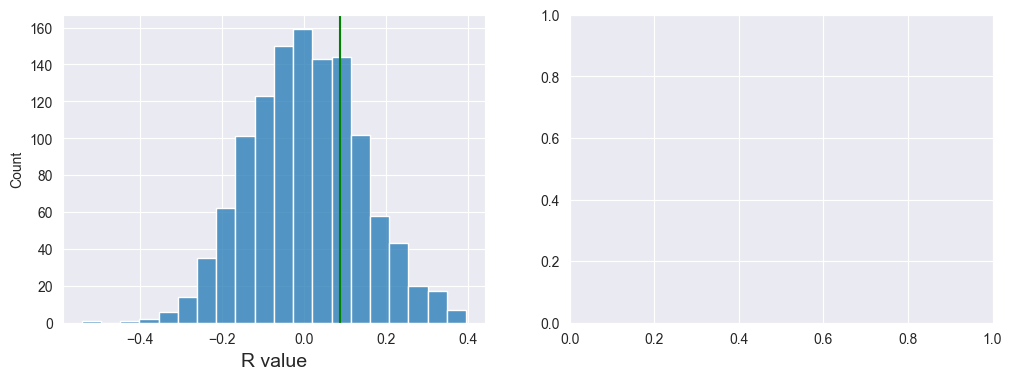

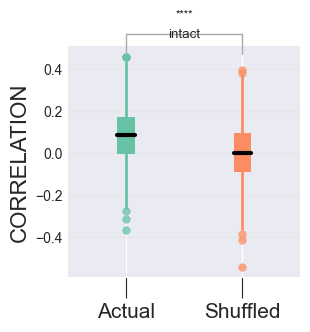

For intact, reward:
 : wilcoxon: z = 505548.0 , p = 6.879924074819486e-46 
Total 1188 random vec, rank of actual (0.08765931418054597) is 0.2786195286195286 (331/1188)
 : wilcoxon: z = 397949.0 , p = 8.133044942941925e-07 


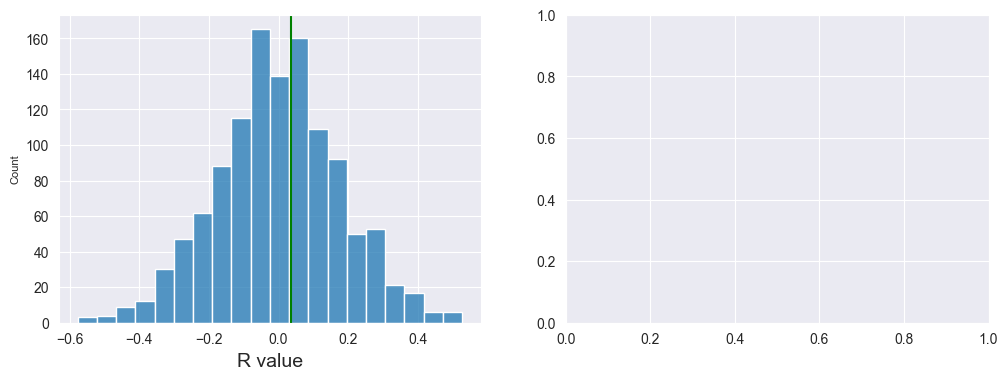

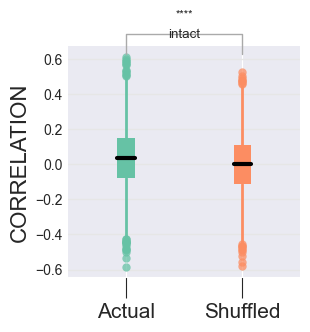

For intact, vision:
 : wilcoxon: z = 397949.0 , p = 8.133044942941925e-07 
Total 1188 random vec, rank of actual (0.03555982847981145) is 0.41835016835016836 (497/1188)


In [4]:


for roi, roi_df in df_to_viz.groupby(['roi']):
    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    null_dist = roi_df[roi_df.pair_type == 'baseline'].score1
    actual_dist = roi_df[roi_df.pair_type == 'actual'].score1
    actual_error = actual_dist.mean()
    #
    sns.histplot(null_dist,  bins=20, ax = axs[0])
    axs[0].axvline(x=actual_error, color='green')
    axs[0].set_xlabel('R value', fontsize = 14)

    s,ax = draw_stars_box(actual_dist,null_dist , 'wilcoxon', suf="", title="intact",
                   alternative = 'greater')
    print(f"For intact, {roi}:")
    print(s)
    actual_rank = [x for x in null_dist if x > actual_error]
    print(f"Total {len(null_dist)} random vec, rank of actual ({actual_error}) is {len(actual_rank)/len(null_dist)} ({len(actual_rank)}/{len(null_dist)})")


 : wilcoxon: z = 407317.0 , p = 1.0389826293325504e-08 


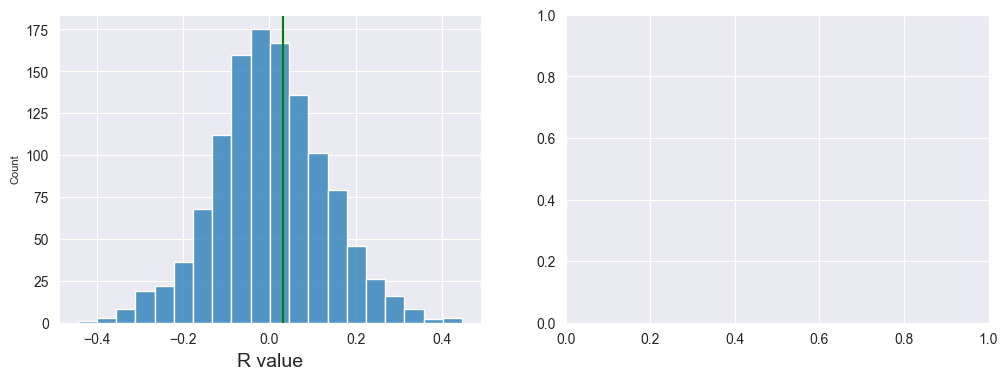

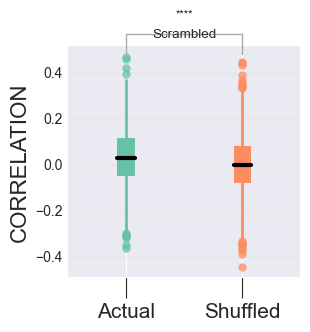

For scrabmled, reward:
 : wilcoxon: z = 407317.0 , p = 1.0389826293325504e-08 
Total 1188 random vec, rank of actual (0.031991740054602626) is 0.3846801346801347 (457/1188)
 : wilcoxon: z = 372554.0 , p = 0.00991241060236402 


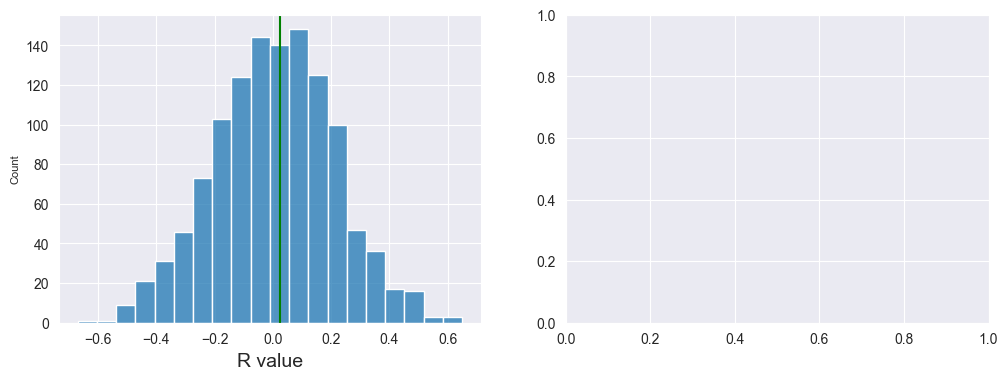

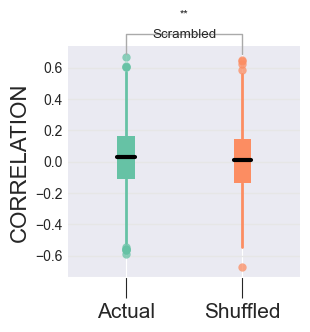

For scrabmled, vision:
 : wilcoxon: z = 372554.0 , p = 0.00991241060236402 
Total 1188 random vec, rank of actual (0.025583774470288565) is 0.46380471380471383 (551/1188)


In [5]:

for roi, roi_df in df_to_viz_scrambled.groupby(['roi']):
    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    null_dist = roi_df[roi_df.pair_type == 'baseline'].score1
    actual_dist = roi_df[roi_df.pair_type == 'actual'].score1
    actual_error = actual_dist.mean()
    #
    sns.histplot(null_dist,  bins=20, ax = axs[0])
    axs[0].axvline(x=actual_error, color='green')
    axs[0].set_xlabel('R value', fontsize = 14)

    s,ax = draw_stars_box(actual_dist,null_dist , 'wilcoxon', suf="", title="Scrambled",
                          alternative = 'greater')
    print(f"For scrabmled, {roi}:")
    print(s)
    actual_rank = [x for x in null_dist if x > actual_error]
    print(f"Total {len(null_dist)} random vec, rank of actual ({actual_error}) is {len(actual_rank)/len(null_dist)} ({len(actual_rank)}/{len(null_dist)})")

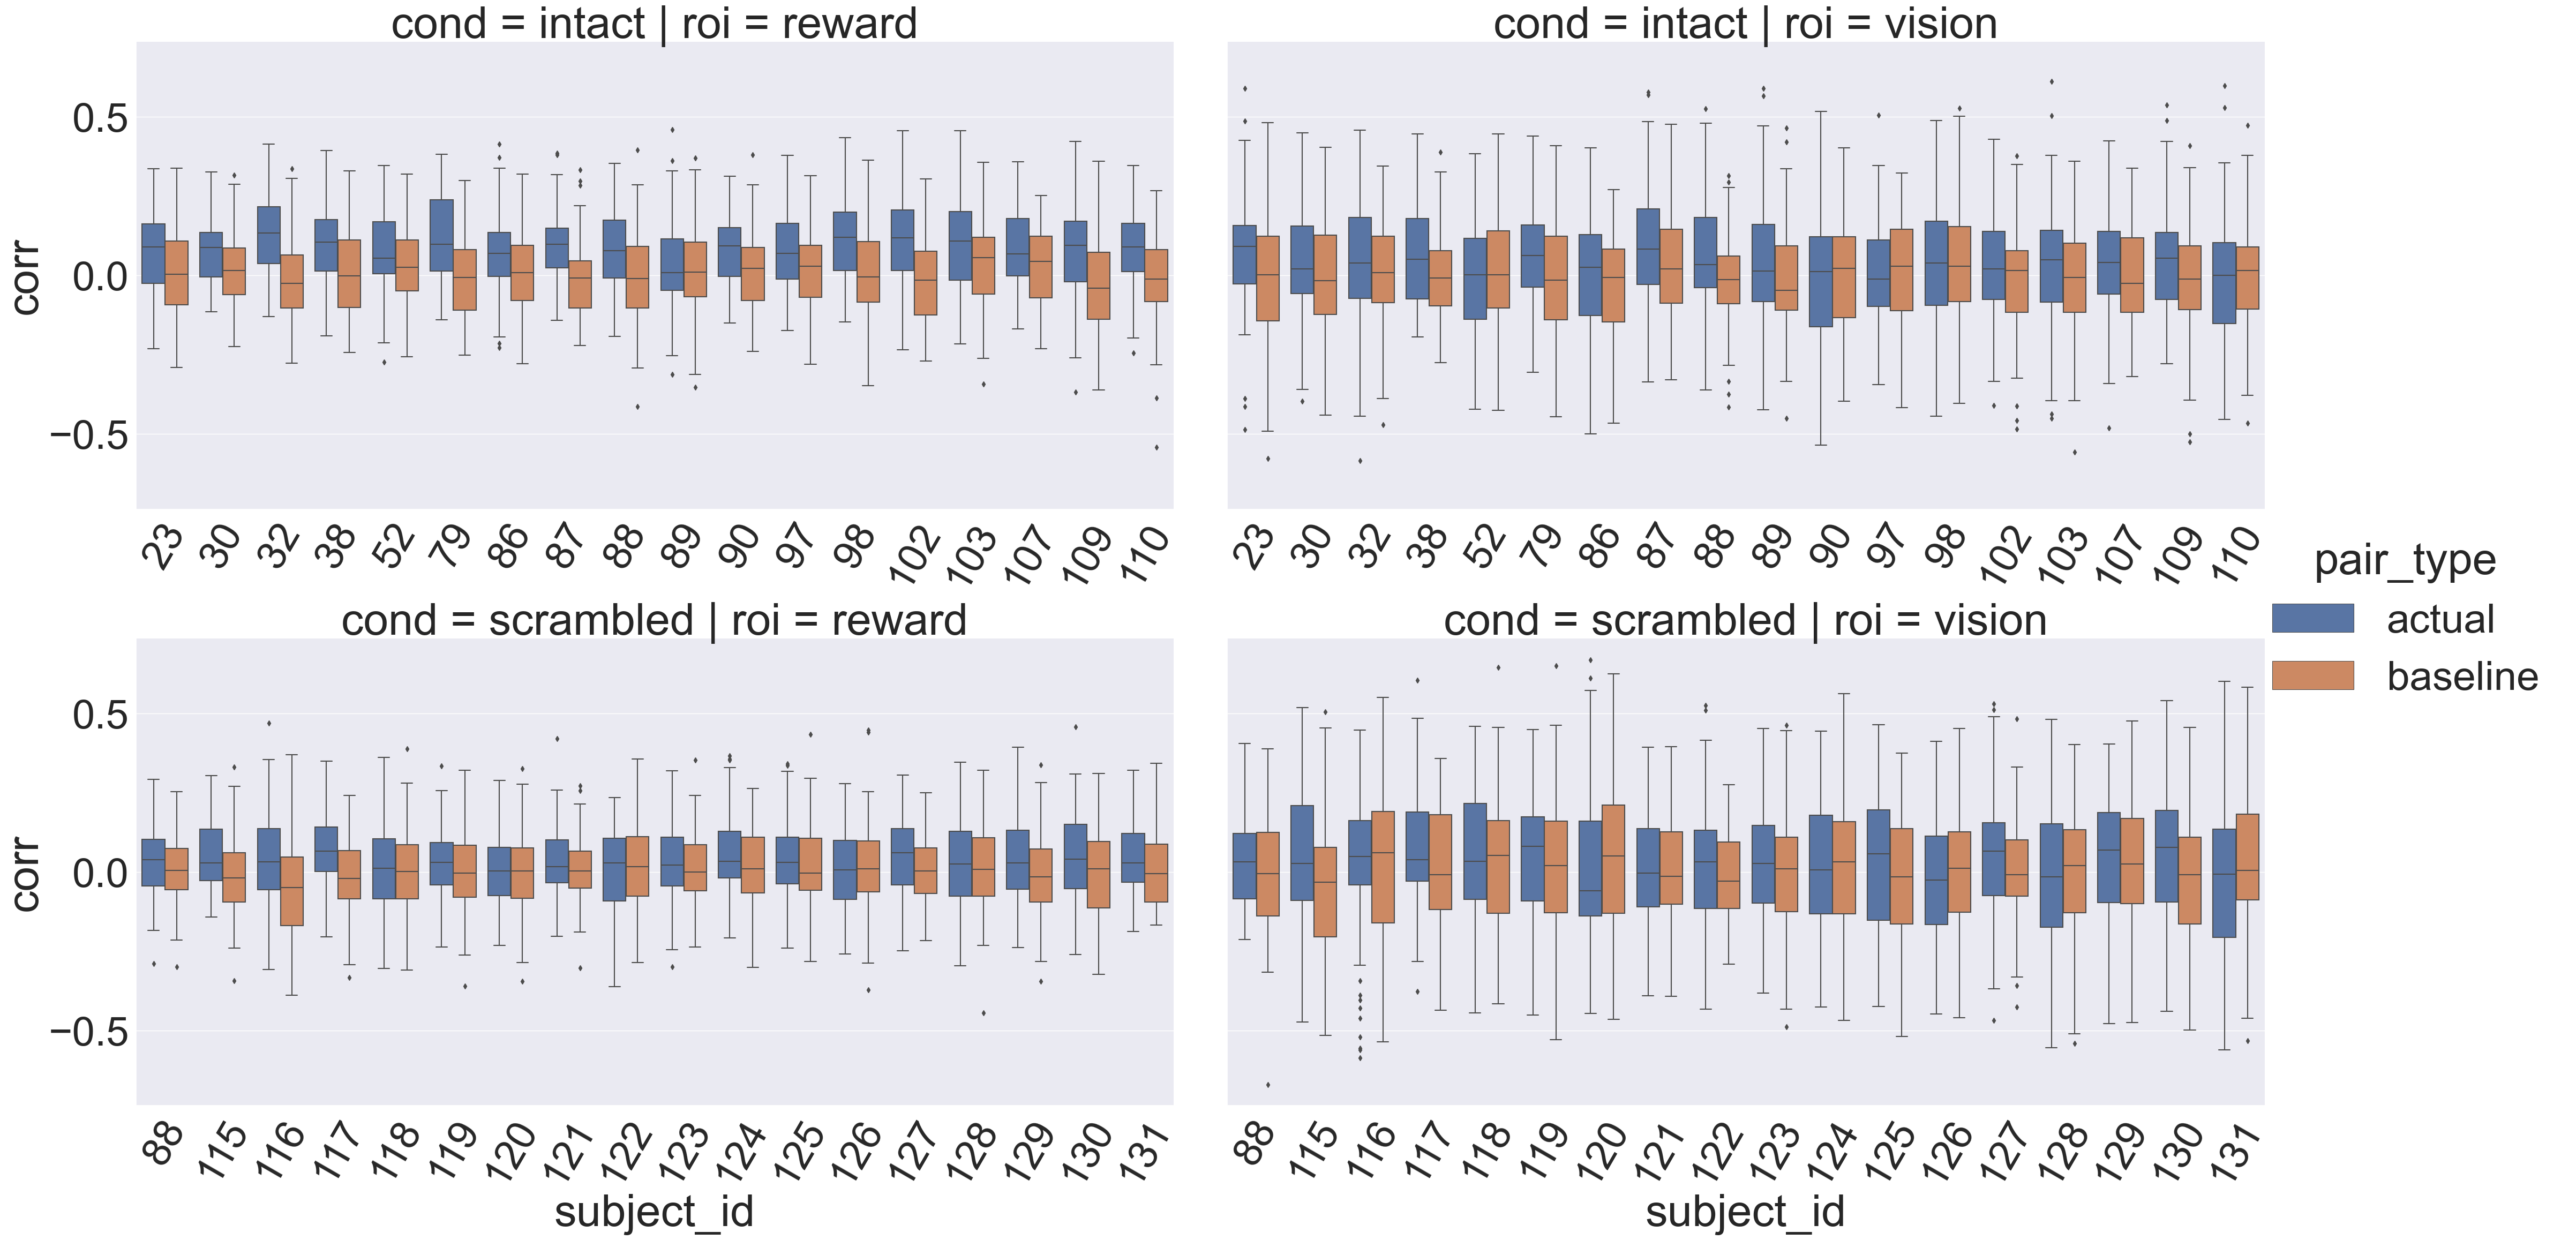

In [6]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(16,5))
h=12
sns.set(font_scale=5)
g = sns.catplot(data=balanced_df[balanced_df.df_type == 'orig'].rename(columns={'score1':'corr'}), hue='pair_type', x='subject_id', row='cond', y='corr', col='roi' , height=h, aspect=22/h,
            kind='box', sharex=False)
# plt.title("per subject - reward")
g.set_xticklabels(rotation=60)

plt.show()
sns.set(font_scale=1)

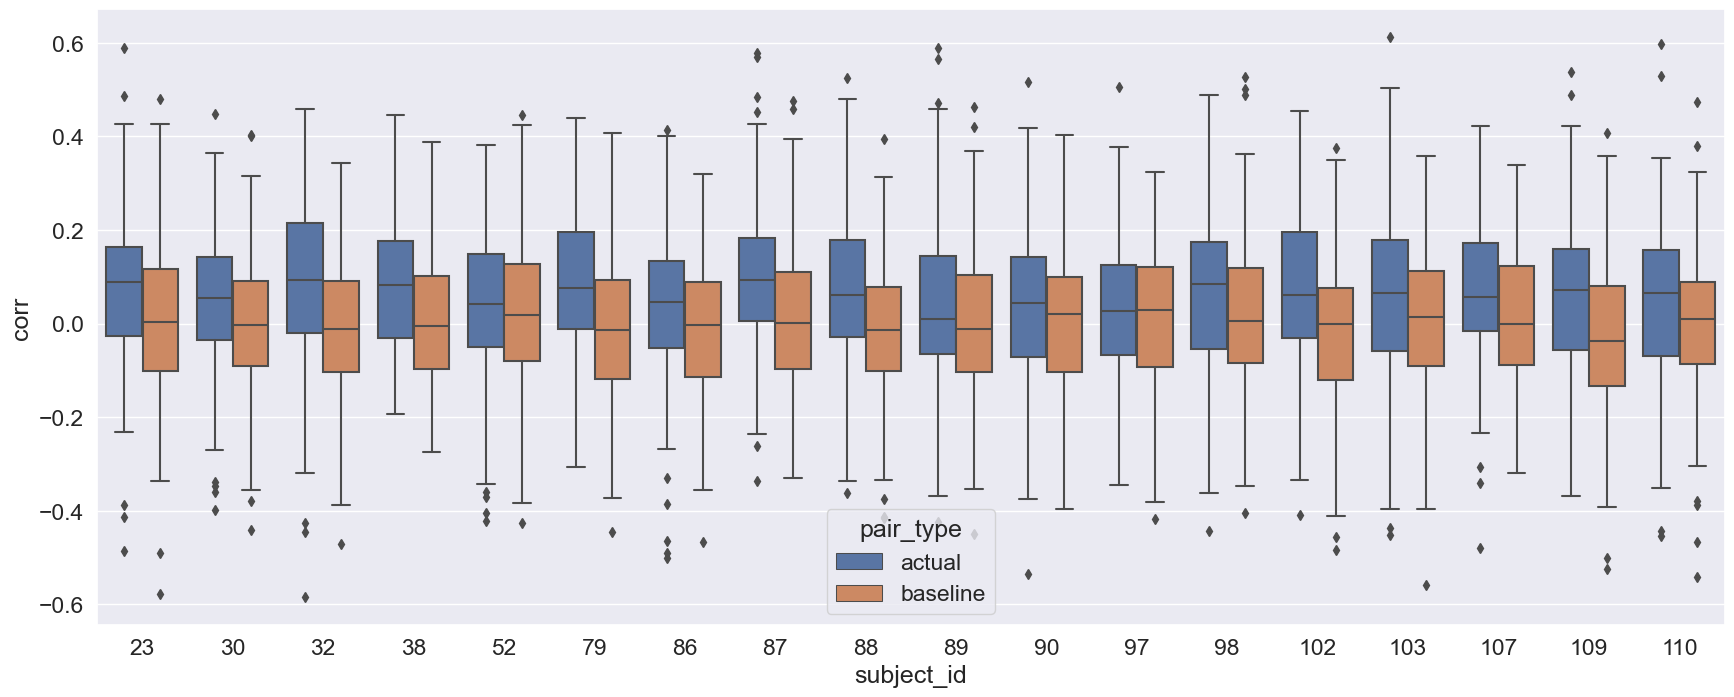

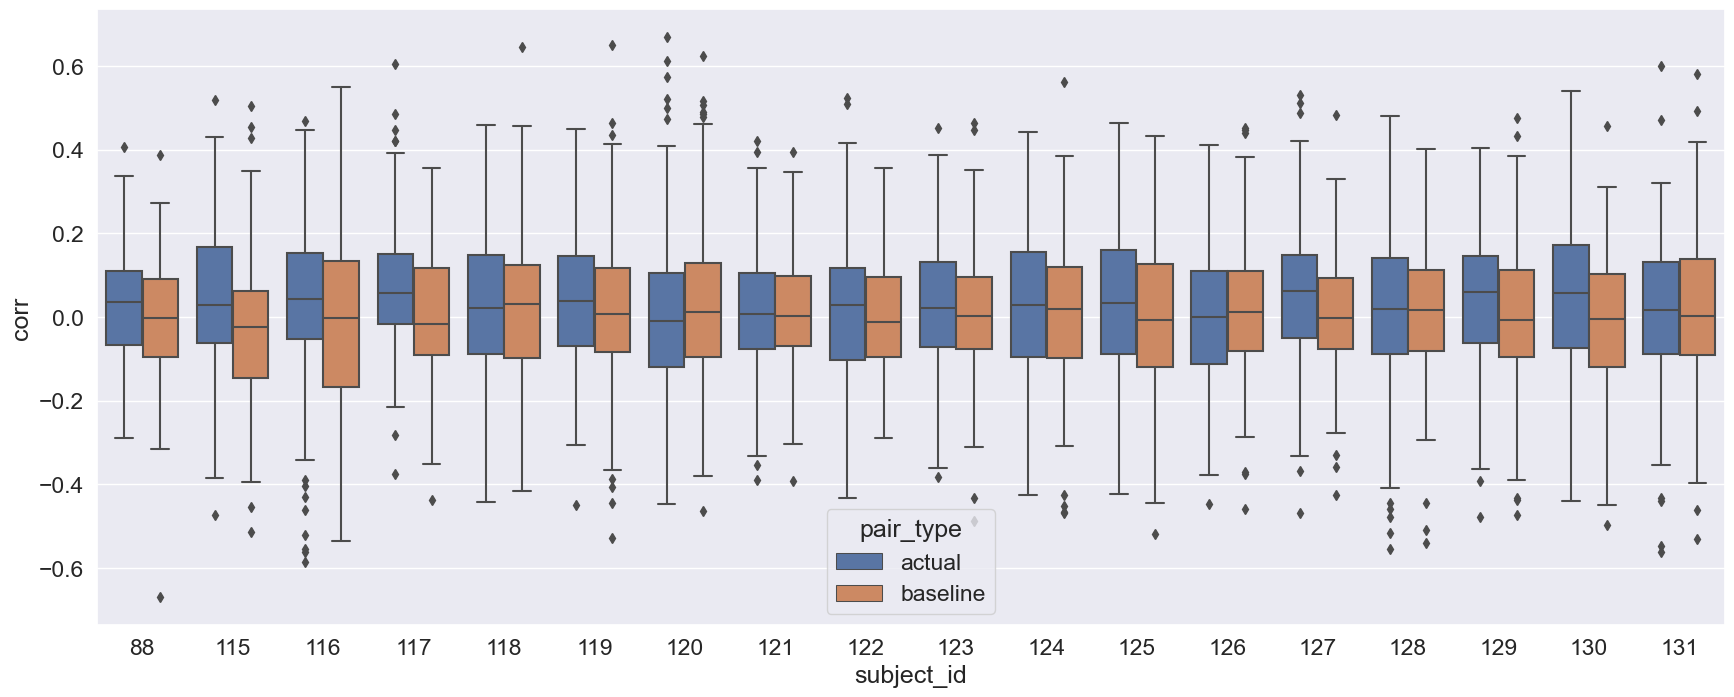

In [7]:

# plt.figure(figsize=(16,5))
h=12
sns.set(font_scale=1.5)
plt.figure(figsize=(21,8))
g = sns.boxplot(data=df_to_viz[df_to_viz.df_type == 'orig'].rename(columns={'score1':'corr'}), hue='pair_type', x='subject_id', y='corr')
# plt.title("per subject - reward")
# g.set_xticklabels(rotation=60)

plt.show()
sns.set(font_scale=1)

import matplotlib.pyplot as plt
h=12
sns.set(font_scale=1.5)
plt.figure(figsize=(21,8))
g = sns.boxplot(data=df_to_viz_scrambled[df_to_viz_scrambled.df_type == 'orig'].rename(columns={'score1':'corr'}), hue='pair_type', x='subject_id', y='corr')


plt.show()
sns.set(font_scale=1)


 for 23 : 0.00000
 for 30 : 0.00000
 for 32 : 0.00000
 for 38 : 0.00000
 for 52 : 0.19000
 for 79 : 0.00000
 for 86 : 0.01000
 for 87 : 0.00000
 for 88 : 0.00000
 for 89 : 0.03000
 for 90 : 0.02000
 for 97 : 0.11000
 for 98 : 0.00000
 for 102 : 0.00000
 for 103 : 0.02000
 for 107 : 0.01000
 for 109 : 0.00000
 for 110 : 0.03000


(0.0, 0.05)

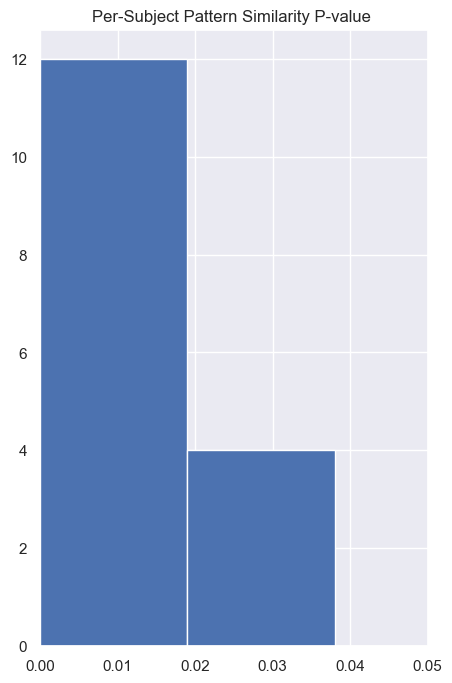

In [8]:

lsbj = []
for subj_idx, subj_df in df_to_viz[df_to_viz.df_type == 'orig'].groupby("subject_id"):
    wp = round(wilcoxon(subj_df[subj_df.pair_type == 'actual'].score1, subj_df[subj_df.pair_type == 'baseline'].score1, alternative = 'greater')[1], 2)
    lsbj.append(wp)
    print(f" for {subj_idx} : {wp:.5f}")

plt.title("Per-Subject Pattern Similarity P-value ")
plt.hist(lsbj, bins=10)
plt.xlim([0,0.05])
# plt.axvline(0.05, c = 'r')

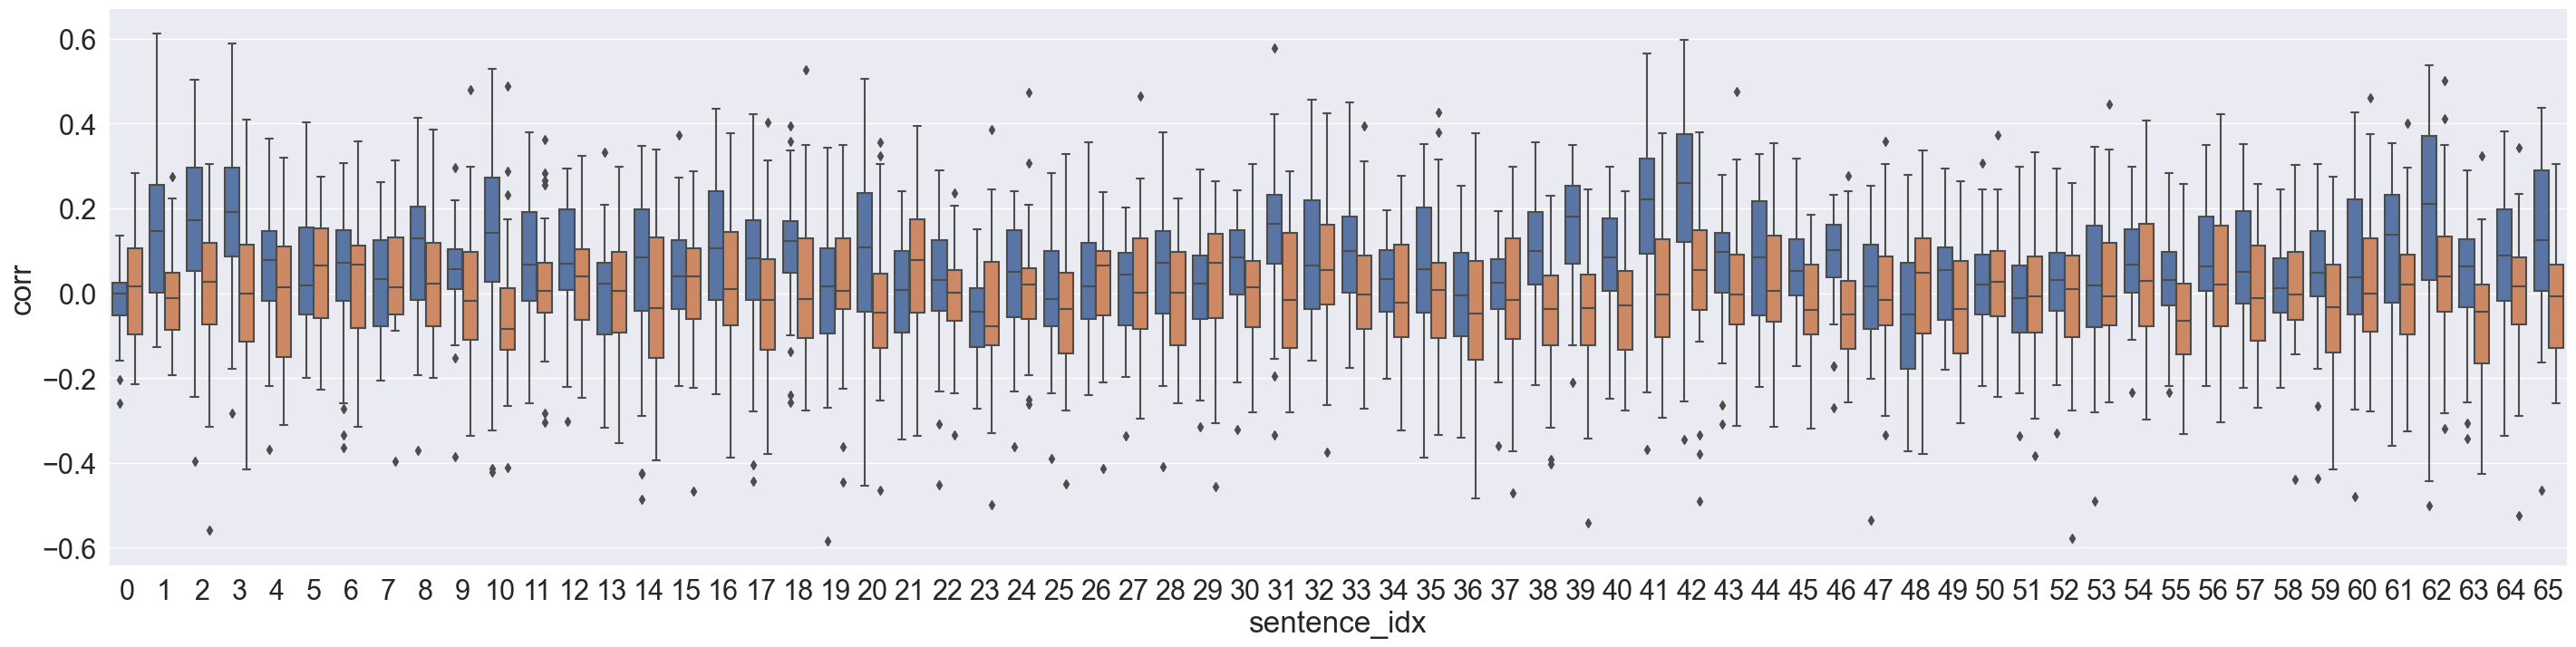

In [9]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(16,5))
h=12
sns.set(font_scale=2)
plt.figure(figsize=(35,8))

ax = sns.boxplot(data=df_to_viz[df_to_viz.df_type == 'orig'].rename(columns={'score1':'corr'}), hue='pair_type', x='sentence_idx', y='corr')
ax.get_legend().remove()


plt.show()
sns.set(font_scale=1)


In [10]:
from scipy.stats import wilcoxon
d = {}
for sentence_idx, sentence_df in df_to_viz[df_to_viz.df_type == 'orig'].groupby("sentence_idx"):
    wp = round(wilcoxon(sentence_df[sentence_df.pair_type == 'actual'].score1, sentence_df[sentence_df.pair_type == 'baseline'].score1, alternative = 'greater')[1], 2)
    d[sentence_idx] = wp
    print(f" for {sentence_idx} : {wp:.3f}")



 for 0 : 0.660
 for 1 : 0.000
 for 2 : 0.000
 for 3 : 0.000
 for 4 : 0.070
 for 5 : 0.450
 for 6 : 0.310
 for 7 : 0.640
 for 8 : 0.080
 for 9 : 0.040
 for 10 : 0.000
 for 11 : 0.010
 for 12 : 0.050
 for 13 : 0.620
 for 14 : 0.140
 for 15 : 0.160
 for 16 : 0.030
 for 17 : 0.050
 for 18 : 0.010
 for 19 : 0.640
 for 20 : 0.000
 for 21 : 0.960
 for 22 : 0.110
 for 23 : 0.710
 for 24 : 0.320
 for 25 : 0.180
 for 26 : 0.620
 for 27 : 0.640
 for 28 : 0.050
 for 29 : 0.540
 for 30 : 0.040
 for 31 : 0.000
 for 32 : 0.150
 for 33 : 0.020
 for 34 : 0.210
 for 35 : 0.040
 for 36 : 0.350
 for 37 : 0.270
 for 38 : 0.000
 for 39 : 0.000
 for 40 : 0.000
 for 41 : 0.000
 for 42 : 0.000
 for 43 : 0.070
 for 44 : 0.050
 for 45 : 0.000
 for 46 : 0.000
 for 47 : 0.530
 for 48 : 0.870
 for 49 : 0.030
 for 50 : 0.390
 for 51 : 0.280
 for 52 : 0.190
 for 53 : 0.180
 for 54 : 0.130
 for 55 : 0.020
 for 56 : 0.190
 for 57 : 0.010
 for 58 : 0.530
 for 59 : 0.000
 for 60 : 0.230
 for 61 : 0.000
 for 62 : 0.010
 f

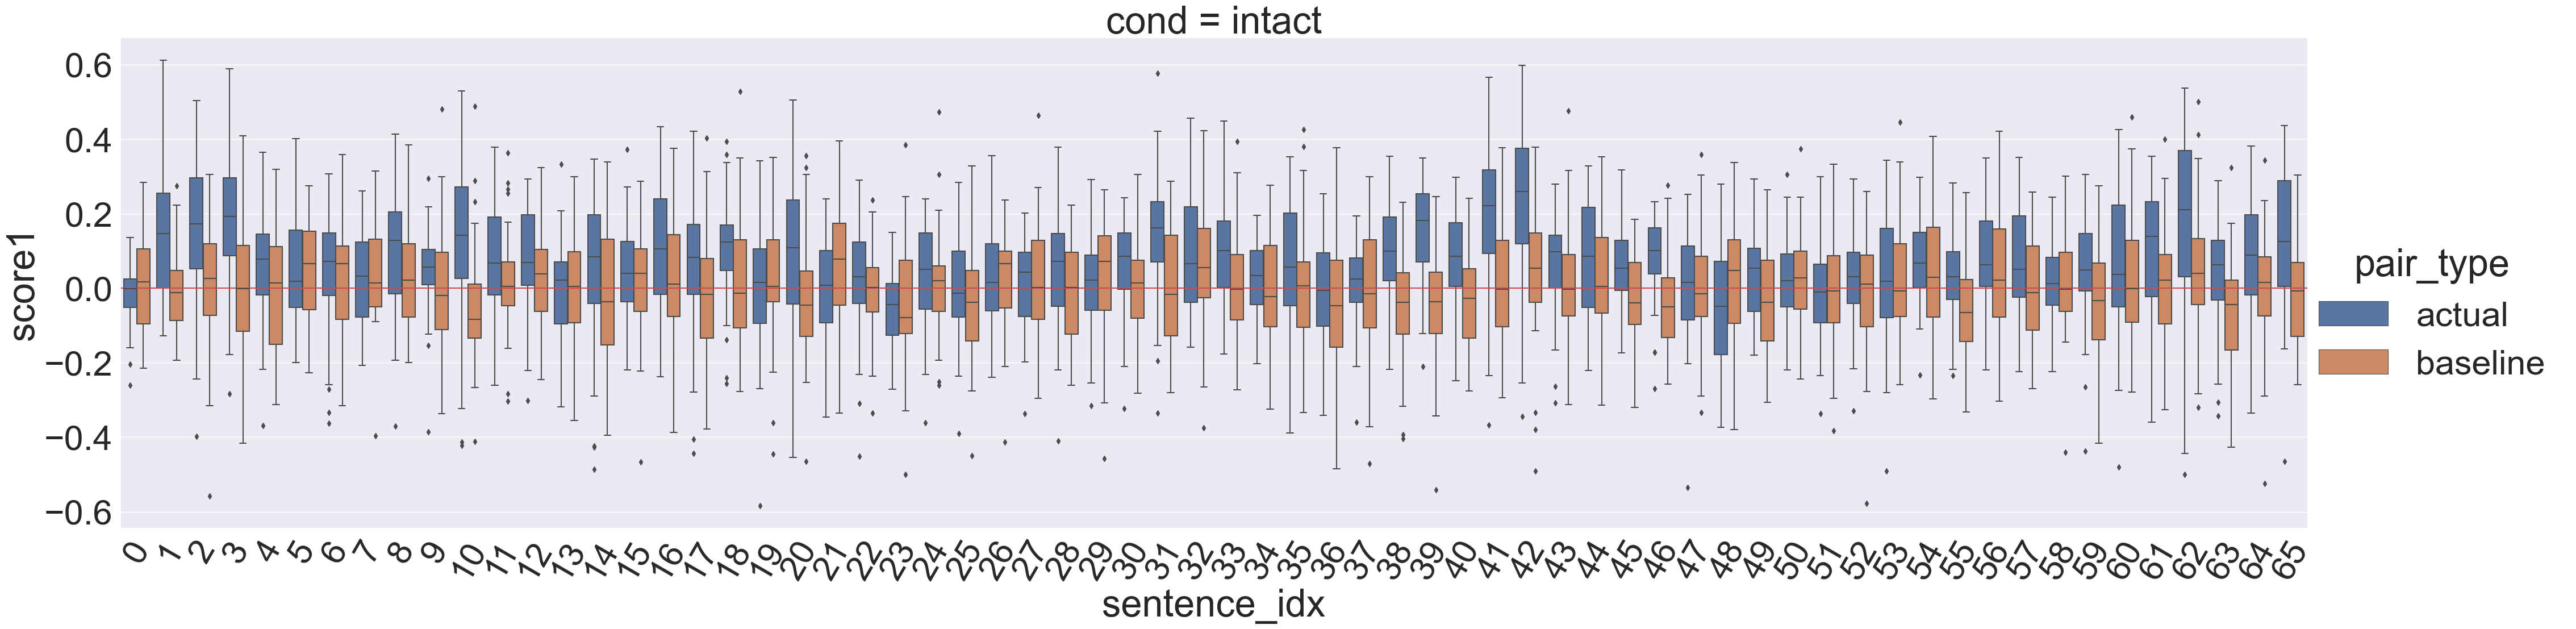

In [11]:
h=12
sns.set(font_scale=4)
sns.catplot(data=df_to_viz[df_to_viz.df_type == 'orig'], hue='pair_type', x='sentence_idx', row='cond', y='score1' , height=h, aspect=42/h,
            kind='box', sharex=False)
plt.axhline(0, color= 'r')
plt.xticks(rotation=60)

# plt.title("per subject - reward")
plt.show()


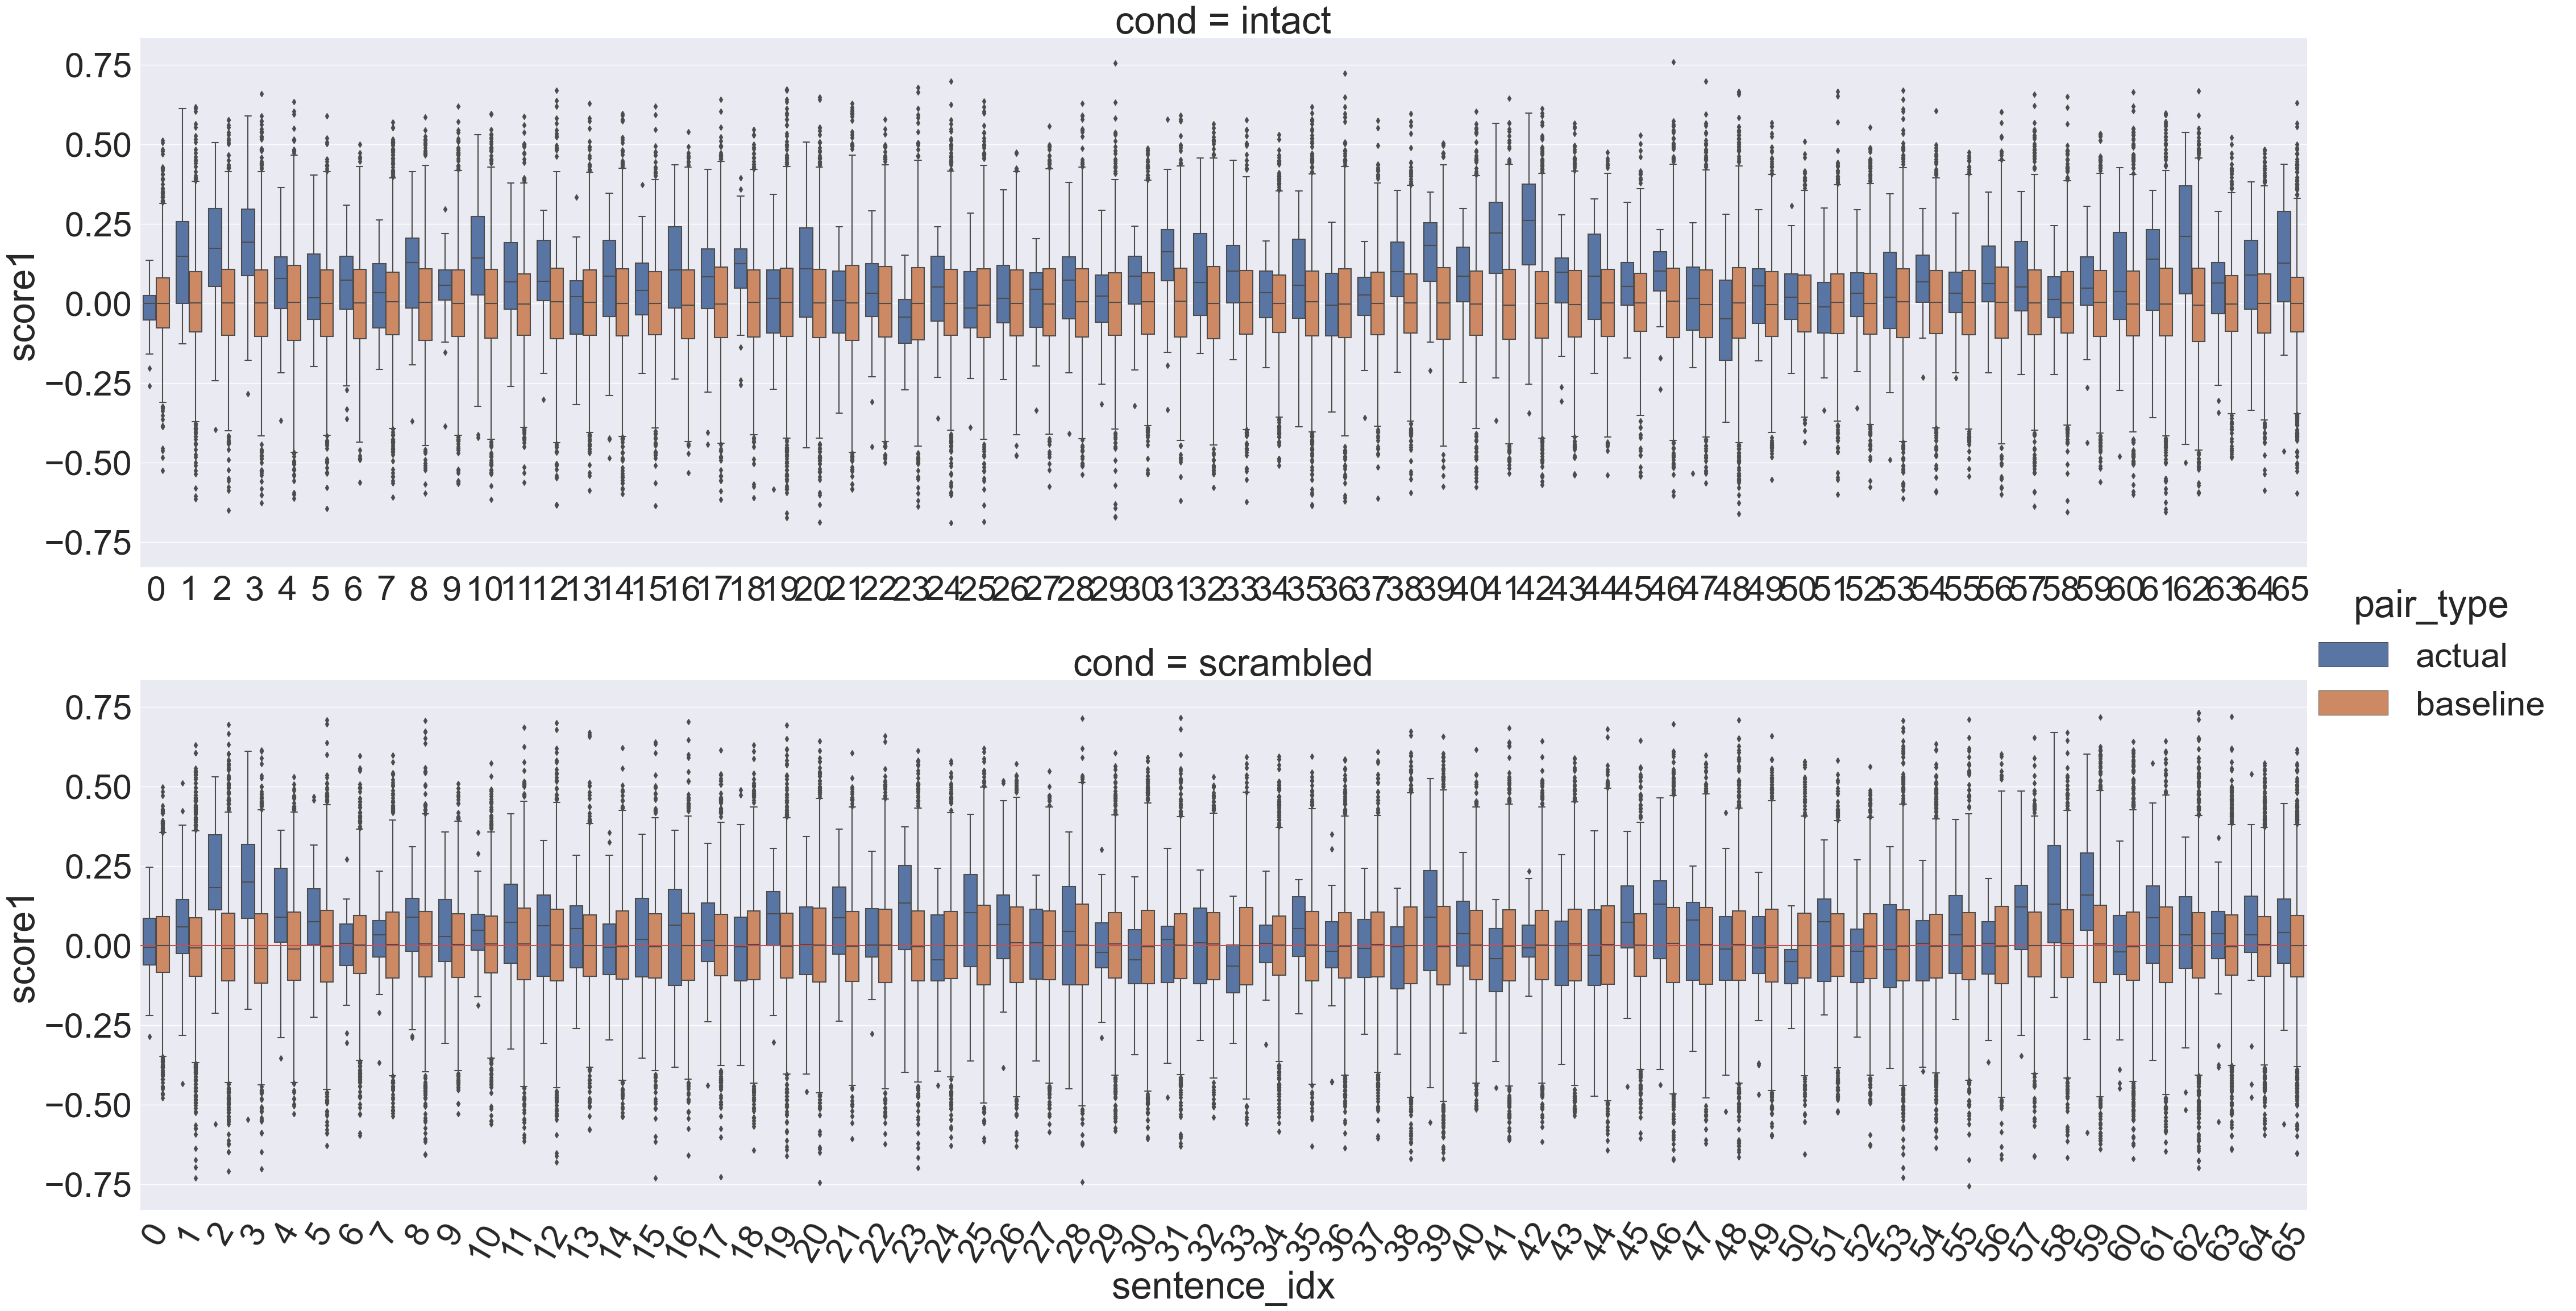

In [12]:
h=12
sns.set(font_scale=4)
sns.catplot(data=df[df.df_type == 'orig'], hue='pair_type', x='sentence_idx', row='cond', y='score1' , height=h, aspect=42/h,
            kind='box', sharex=False)
plt.axhline(0, color= 'r')
plt.xticks(rotation=60)

# plt.title("per subject - reward")
plt.show()

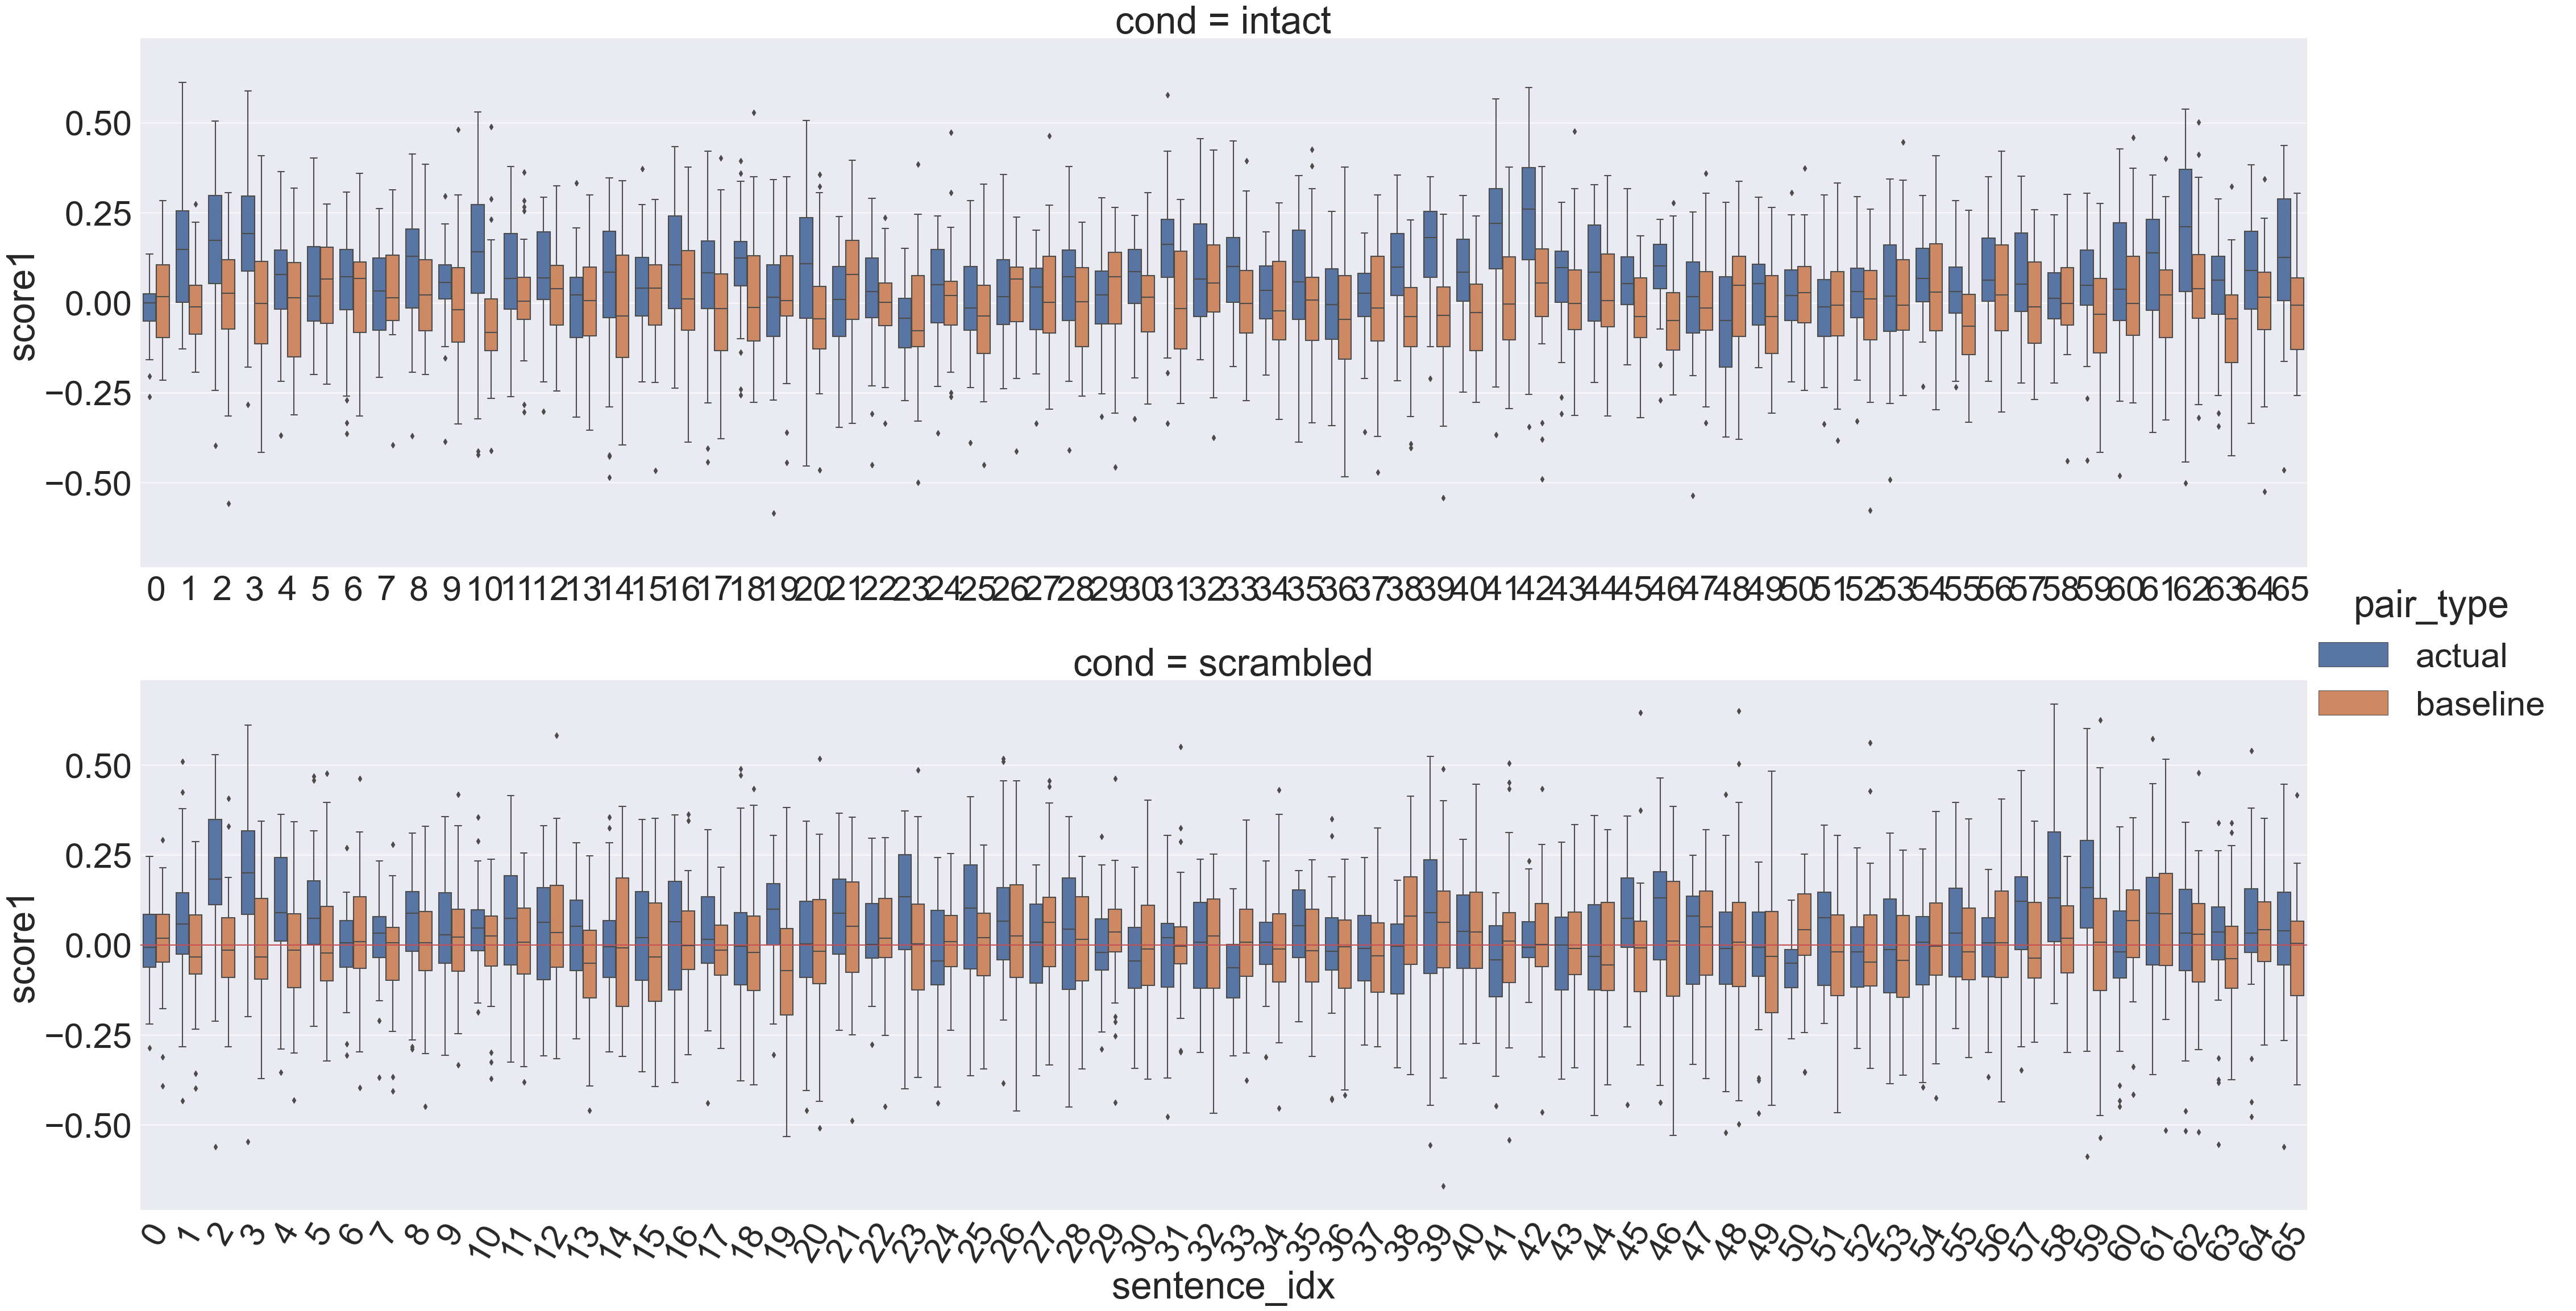

In [13]:
h=12
sns.set(font_scale=4)
sns.catplot(data=balanced_df[balanced_df.df_type == 'orig'], hue='pair_type', x='sentence_idx', row='cond', y='score1' , height=h, aspect=42/h,
            kind='box', sharex=False)
plt.axhline(0, color= 'r')
plt.xticks(rotation=60)

# plt.title("per subject - reward")
plt.show()


In [15]:
import joblib
from configs.params import alignment_dict_fn_onlyaim2 as alignment_dict_fn
alignment_dict = joblib.load(alignment_dict_fn)
nlp_df = alignment_dict["nlp_data_df"]
nlp_df

C:\Users\orenk\Desktop\Reward_Predictability_Paper\venv\lib\site-packages\nilearn\input_data\__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.


,sentence_idx,word_indices,sequence_type,start_onset,end_onset,tr_start,tr_end,len_tr,baseline_text,synonyms_text,vodka_text,vodka,synonyms,baseline,vodka_perplexity_score,aligned_TRs_of_sentence
0,0,None,sentence,0.000,3.800,1,3,3,He took a deep breath; and tried to calm down.,Martin took a deep breath and tried to calm down.,She took a deep breath and tried to calm down.,{'text': 'She took a deep breath and tried to ...,{'text': 'Martin took a deep breath and tried ...,{'text': 'He took a deep breath; and tried to ...,7.231925e+04,"[0, 1, 2]"
1,1,None,sentence,3.810,12.250,4,9,6,the situation seemed almost hopeless and after...,"the situation seemed too good, and after she s...","The situation seemed too good, and after she s...","{'text': 'The situation seemed too good, and a...","{'text': 'the situation seemed too good, and a...",{'text': 'the situation seemed almost hopeless...,2.417996e+05,"[3, 4, 5, 6, 7, 8]"
2,2,None,sentence,12.260,17.500,10,12,3,He looked at his reflection in the mirror and ...,Martin looked at the reflection in the mirror ...,She looked at her reflection in the mirror and...,{'text': 'She looked at her reflection in the ...,{'text': 'Martin looked at the reflection in t...,{'text': 'He looked at his reflection in the m...,1.725798e+05,"[9, 10, 11]"
3,3,None,sentence,17.510,26.176,13,18,6,"That evening, at his deepest moment of despair...","That evening, at the utmost moment of hopeless...","That evening, at her biggest moment of triumph...","{'text': 'That evening, at her biggest moment ...","{'text': 'That evening, at the utmost moment o...","{'text': 'That evening, at his deepest moment ...",3.014032e+05,"[12, 13, 14, 15, 16, 17]"
4,4,None,sentence,26.186,36.630,19,25,7,"In general, advice from his mother resembled a...","In general, help from his mom resembled an len...","In general, conversations with her mother res...","{'text': ' In general, conversations with her ...","{'text': 'In general, help from his mom resemb...","{'text': 'In general, advice from his mother r...",4.046173e+05,"[18, 19, 20, 21, 22, 23, 24]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,61,None,sentence,375.810,380.900,251,253,3,"“It’s Fine. I’ll be back in a jiffy,” he said ...","""That's OK. I’ll be back in a jiffy,” Martin s...","“I’m sorry, I’ll be back in a jiffy,” she said...","{'text': '“I’m sorry, I’ll be back in a jiffy,...","{'text': '""That's OK. I’ll be back in a jiffy,...","{'text': '“It’s Fine. I’ll be back in a jiffy,...",7.297120e+05,"[250, 251, 252]"
62,62,None,sentence,380.910,390.000,254,259,6,"On his way to his seat, while swallowing what ...","On the way to their table, while munching what...","On her way to the stage, while licking what wa...","{'text': 'On her way to the stage, while licki...","{'text': 'On the way to their table, while mun...","{'text': 'On his way to his seat, while swallo...",1.840372e+05,"[253, 254, 255, 256, 257, 258]"
63,63,None,sentence,390.010,392.270,260,261,2,I must never admit this to mom.,I must never admit this to mom.,I must never admit this to mom.,"{'text': 'I must never admit this to mom. ', '...","{'text': 'I must never admit this to mom.', 'w...","{'text': 'I must never admit this to mom.', 'w...",1.223280e+06,"[259, 260]"
64,64,None,sentence,392.280,396.100,262,264,3,He moved the chair with a big smile on his face.,Martin pushed his stool with large foolish gri...,She entered the stage with a blank stare in he...,{'text': 'She entered the stage with a blank s...,{'text': 'Martin pushed his stool with large f...,{'text': 'He moved the chair with a big smile ...,2.029145e+05,"[261, 262, 263]"


In [16]:
merged_df = pd.merge(left=df, right=nlp_df[['sentence_idx','vodka_perplexity_score']], left_on=['sentence_idx'],right_on=['sentence_idx'])
merged_df

,df_type,cond,roi,subject_id,sentence_idx,pair_type,score_type,idx_pairs,score1,pval1,score2,pval2,vodka_perplexity_score
0,orig,intact,reward,23,0,actual,correlation,"(nan, nan)",-0.041821,4.461067e-06,-0.029221,0.001348,72319.250000
1,orig,intact,reward,23,0,baseline,correlation,"(0, 0)",-0.041821,4.461067e-06,-0.029221,0.001348,72319.250000
2,orig,intact,reward,23,0,baseline,correlation,"(0, 1)",-0.087162,9.920115e-22,-0.029221,0.001348,72319.250000
3,orig,intact,reward,23,0,baseline,correlation,"(0, 2)",-0.137113,1.407278e-51,-0.029221,0.001348,72319.250000
4,orig,intact,reward,23,0,baseline,correlation,"(0, 3)",-0.045294,6.690056e-07,-0.029221,0.001348,72319.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591915,pca20,scrambled,vision,131,65,baseline,distance,"(65, 61)",23.829915,NaN,0.560333,NaN,216677.265625
1591916,pca20,scrambled,vision,131,65,baseline,distance,"(65, 62)",27.488490,NaN,1.158588,NaN,216677.265625
1591917,pca20,scrambled,vision,131,65,baseline,distance,"(65, 63)",31.831500,NaN,1.420395,NaN,216677.265625
1591918,pca20,scrambled,vision,131,65,baseline,distance,"(65, 64)",35.688040,NaN,1.380625,NaN,216677.265625


In [17]:
vodka_perplexity_median = nlp_df['vodka_perplexity_score'].median()
merged_df['perpl_high'] = merged_df['vodka_perplexity_score'].ge(vodka_perplexity_median).tolist()
merged_df

,df_type,cond,roi,subject_id,sentence_idx,pair_type,score_type,idx_pairs,score1,pval1,score2,pval2,vodka_perplexity_score,perpl_high
0,orig,intact,reward,23,0,actual,correlation,"(nan, nan)",-0.041821,4.461067e-06,-0.029221,0.001348,72319.250000,False
1,orig,intact,reward,23,0,baseline,correlation,"(0, 0)",-0.041821,4.461067e-06,-0.029221,0.001348,72319.250000,False
2,orig,intact,reward,23,0,baseline,correlation,"(0, 1)",-0.087162,9.920115e-22,-0.029221,0.001348,72319.250000,False
3,orig,intact,reward,23,0,baseline,correlation,"(0, 2)",-0.137113,1.407278e-51,-0.029221,0.001348,72319.250000,False
4,orig,intact,reward,23,0,baseline,correlation,"(0, 3)",-0.045294,6.690056e-07,-0.029221,0.001348,72319.250000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591915,pca20,scrambled,vision,131,65,baseline,distance,"(65, 61)",23.829915,NaN,0.560333,NaN,216677.265625,False
1591916,pca20,scrambled,vision,131,65,baseline,distance,"(65, 62)",27.488490,NaN,1.158588,NaN,216677.265625,False
1591917,pca20,scrambled,vision,131,65,baseline,distance,"(65, 63)",31.831500,NaN,1.420395,NaN,216677.265625,False
1591918,pca20,scrambled,vision,131,65,baseline,distance,"(65, 64)",35.688040,NaN,1.380625,NaN,216677.265625,False


In [18]:
per_sen_score = df[(df.df_type == 'orig') & (df.pair_type == 'actual') &(df.cond=='intact') & (df.roi=='reward')].groupby('sentence_idx').score1.mean()
per_sen_perplexity = nlp_df['vodka_perplexity_score']
from scipy.stats import pearsonr ,spearmanr, wilcoxon, mannwhitneyu
regdf = pd.DataFrame()
regdf["per_sen_perplexity"] = per_sen_perplexity
regdf["per_sen_score"] = per_sen_score
# regdf = regdf[regdf["per_sen_perplexity"] > 0.4e6]
x1 = regdf["per_sen_perplexity"]
x2 = regdf["per_sen_score"]
print(len(x1), len(x2))
print(pearsonr(x1, x2))
print(spearmanr(x1, x2))
print(wilcoxon(x1, x2))
print(mannwhitneyu(x1, x2))

66 66
(0.14617593321181493, 0.24153753276963968)
SpearmanrResult(correlation=0.07049368541905857, pvalue=0.5738083495364272)
WilcoxonResult(statistic=0.0, pvalue=1.640948467627228e-12)
MannwhitneyuResult(statistic=0.0, pvalue=1.880919899843148e-23)


<AxesSubplot: xlabel='per_sen_perplexity', ylabel='per_sen_score'>

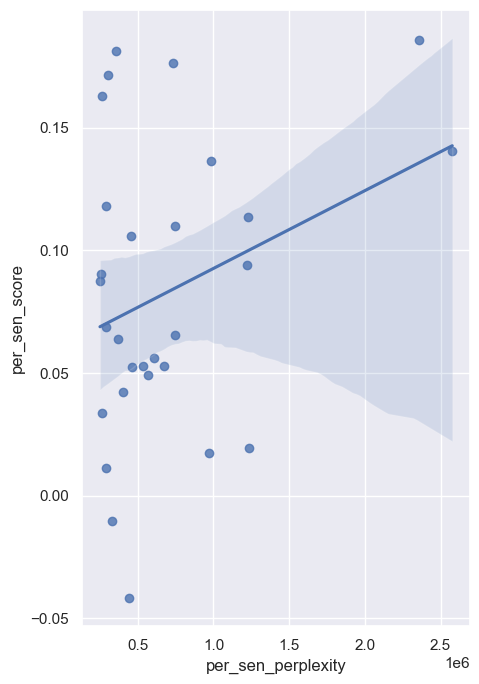

In [19]:
sns.set(font_scale=1)
regdf = pd.DataFrame()
regdf["per_sen_perplexity"] = per_sen_perplexity
regdf["per_sen_score"] = per_sen_score
sns.regplot(data = regdf[regdf.per_sen_perplexity > 0.25e6], x='per_sen_perplexity', y='per_sen_score')

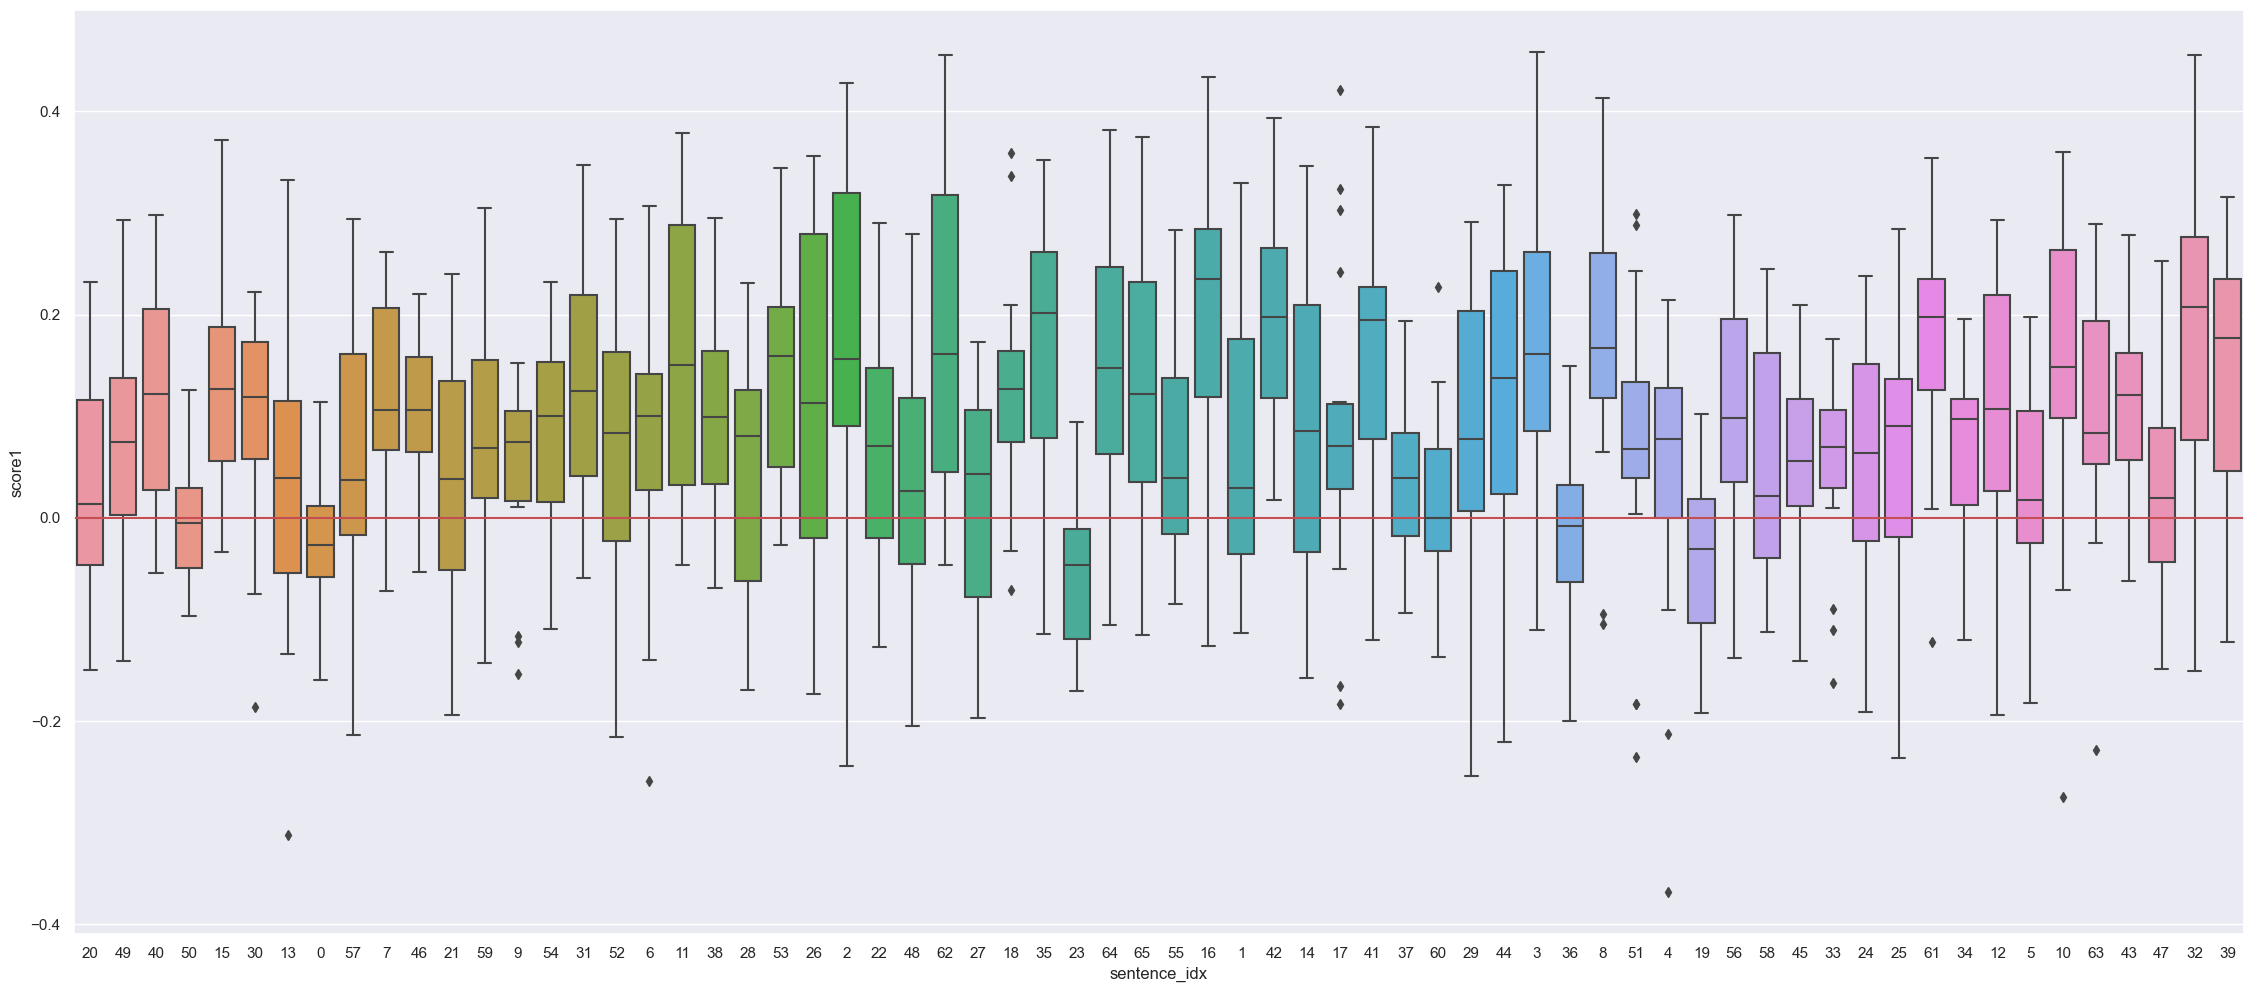

In [20]:
plt.figure(figsize=(28,12))

sns.boxplot(data=df[(df.df_type == 'orig') & (df.pair_type == 'actual') &(df.cond=='intact') & (df.roi=='reward')], x='sentence_idx', y='score1', order=nlp_df.sort_values(by='vodka_perplexity_score').sentence_idx
            )
plt.axhline(0, color= 'r')
# plt.title("per subject - reward")
plt.show()